## Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer,LabelEncoder
import lightgbm as lgbm
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score # モデル評価用(正答率)
from sklearn.metrics import log_loss # モデル評価用(logloss)     
from sklearn.metrics import roc_auc_score # モデル評価用(auc)
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')
pd.set_option('Display.max_columns',100)
pd.set_option('Display.max_rows',100)

## Import Dataset

In [4]:
path = "../final_assignment_public/Telecom_customer_churn.csv"
df = pd.read_csv( path )

### Categorical data

In [5]:
# カテゴリカル変数を表示
x_cat = df[df.select_dtypes( include=object ).columns].columns

# カテゴリカル変数を落とす(理解不能なため)
df = df.drop( columns=x_cat )
df

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.000000,42.333333,0.0,45.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.000000,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.000000,132.600000,0.000000,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,149.98999,2.0,2.0,0.0,0.0,15.0,1.0,4.0,3.0,0.0,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.000000,69.000000,0.0,193.333333,0.000000,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.000000,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.000000,75.333333,0.000000,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,NaN,7.0,6.0,1.0,1.0,1.0,1.0,5.0,1.0,0.0,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.000000,0.333333,0.0,6.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,5.193333,0.000000,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,29.98999,2.0,1.0,0.0,0.0,7.0,2.0,5.0,2.0,0.0,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.000000,1.333333,0.0,3.666667,0.000000,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.000000,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.000000,3.380000,0.000000,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,29.98999,1.0,1.0,0.0,0.0,6.0,4.0,6.0,1.0,0.0,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.000000,94.666667,0.0,137.000000,0.000000,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.000000,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.000000,173.476667,0.000000,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57,1,1,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,149.98999,6.0,4.0,0.0,0.0,5.0,1.0,6.0,1.0,0.0,434.0,1000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.0,0.000000,0.0,7.666667,0.0,54.666667,0.000000,3.000000,0.0,45.333333,

### Numerical data

In [6]:
# 数値変数を確認
numerical = df[df.select_dtypes( exclude=object ).columns]
x_num = numerical.columns

# 欠損値を0で埋める
df[x_num] = numerical.fillna(0)
df

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.000000,42.333333,0.0,45.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.000000,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.000000,132.600000,0.000000,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,149.98999,2.0,2.0,0.0,0.0,15.0,1.0,4.0,3.0,0.0,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.000000,69.000000,0.0,193.333333,0.000000,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.000000,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.000000,75.333333,0.000000,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,0.00000,7.0,6.0,1.0,1.0,1.0,1.0,5.0,1.0,0.0,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.000000,0.333333,0.0,6.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,5.193333,0.000000,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,29.98999,2.0,1.0,0.0,0.0,7.0,2.0,5.0,2.0,0.0,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.000000,1.333333,0.0,3.666667,0.000000,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.000000,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.000000,3.380000,0.000000,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,29.98999,1.0,1.0,0.0,0.0,6.0,4.0,6.0,1.0,0.0,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.000000,94.666667,0.0,137.000000,0.000000,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.000000,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.000000,173.476667,0.000000,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57,1,1,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,149.98999,6.0,4.0,0.0,0.0,5.0,1.0,6.0,1.0,0.0,434.0,1000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0000,0.00,0.000,0.0000,0.00,0.0,0.0,0.0,0.0,0.00,0.0000,2.000000,0.0,0.000000,0.0,7.666667,0.0,54.666667,0.000000,3.000

## Train Test Split

In [7]:
df_train, df_test = train_test_split( df, test_size=0.2, random_state=4 )

print( 'df_train: {}'.format( len(df_train) ) )
print( 'df_test : {}'.format( len(df_test) ) )

df_train: 80000
df_test : 20000


In [8]:
# trainデータを説明変数(X_train)と目的変数(y_train)に分割
X_train = df_train.drop( 'churn', axis=1 )
y_train = df_train['churn']
 
# testデータを説明変数(X_test)と目的変数(y_test)に分割
X_test  = df_test.drop( 'churn', axis=1 )
y_test  = df_test['churn']

## Train & Predict

In [9]:
# LightGBM model
model = LGBMClassifier(
        boosting_type='gbdt', 
        class_weight='balanced',
        max_depth=10,
        num_iteration=100,
        num_threads=1 )

In [10]:
# 学習
model.fit( X_train, y_train )

[LightGBM] [Warning] num_iterations is set=1000, num_iteration=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


LGBMClassifier(class_weight='balanced', max_depth=15, num_iteration=1000,
               num_threads=1)

In [11]:
# 予測
y_pred = model.predict( X_test )
y_pred_prob = model.predict_proba( X_test ) # テストデータのクラス予測確率を返す

## Evaluate the model

In [12]:
# 真値と予測値の表示
df_pred = pd.DataFrame( {'churn_GT':y_test, 'churn_pred':y_pred} )
display( df_pred )

# 真値と予測確率の表示
df_pred_prob = pd.DataFrame( {'churn_GT':y_test, '0_prob':y_pred_prob[:,0], '1_prob':y_pred_prob[:,1]})
display( df_pred_prob )

,churn_GT,churn_pred
60645,1,1
84599,1,0
59801,0,0
90055,0,0
94213,1,1
...,...,...
3081,0,0
98897,0,0
69223,0,0
34419,1,1


,churn_GT,0_prob,1_prob
60645,1,0.483174,0.516826
84599,1,0.501909,0.498091
59801,0,0.712150,0.287850
90055,0,0.875274,0.124726
94213,1,0.377748,0.622252
...,...,...,...
3081,0,0.880810,0.119190
98897,0,0.582775,0.417225
69223,0,0.773362,0.226638
34419,1,0.259635,0.740365


In [13]:
# モデル評価
# acc: 正答率
acc     = accuracy_score( y_test, y_pred )
print( 'Acc:\t', acc )

# logloss 
logloss = log_loss( y_test, y_pred_prob ) # 引数 : log_loss(正解クラス,[クラス0の予測確率,クラス1の予測確率])
print( 'logloss:', logloss )

# AUC 
auc     = roc_auc_score( y_test,y_pred_prob[:,1]) # 引数 : roc_auc_score(正解クラス, クラス1の予測確率)
print( 'AUC:\t', auc )

Acc:	 0.6311
logloss: 0.6427385140276681
AUC:	 0.682024128217154


In [21]:
# ROC曲線の描画
from sklearn import metrics
from sklearn.metrics import roc_curve

def plot_roc_curve():
    plt.rcParams["figure.figsize"] = (12, 10)
    
    fpr, tpr, thresholds = roc_curve( y_test, y_pred_prob[:,1] )
    auc = metrics.auc( fpr, tpr )

    plt.plot( fpr, tpr, label='ROC curve (area = %.2f)'%auc, color='black' )
    plt.legend( fontsize=20 )
    plt.xlabel( 'FPR: False positive rate', fontsize=24 )
    plt.ylabel( 'TPR: True positive rate', fontsize=24 )
    plt.xticks( fontsize=20 )
    plt.yticks( fontsize=20 )
    # plt.grid()
    plt.show()

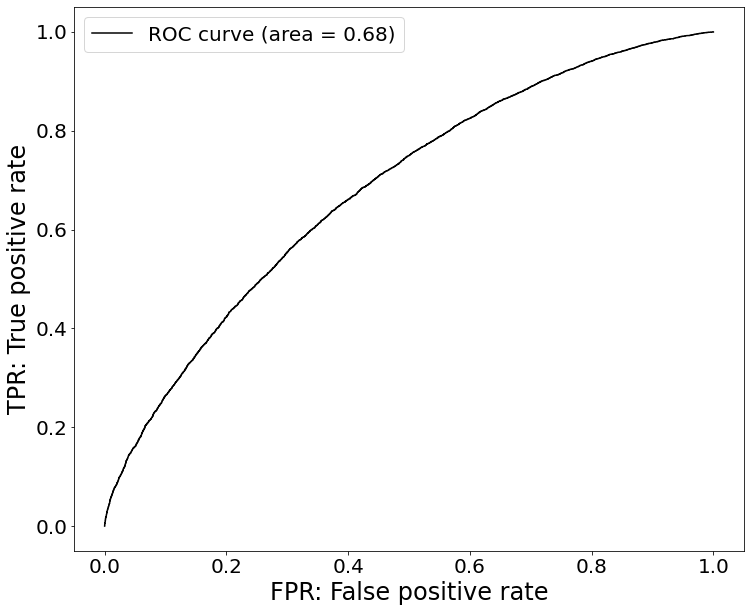

In [22]:
plot_roc_curve()

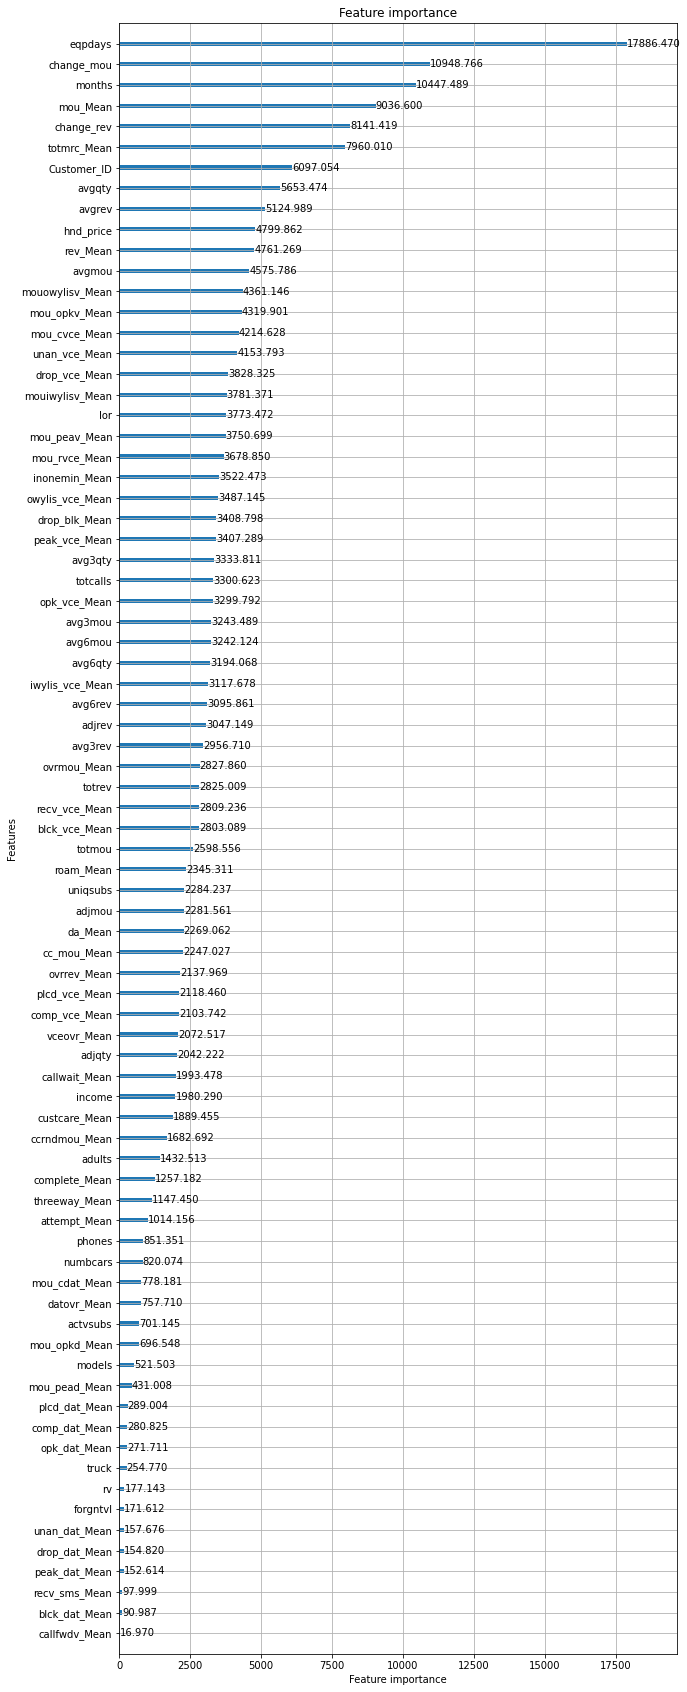

In [16]:
lgbm.plot_importance( model, importance_type="gain", max_num_features=100, figsize=(10, 30) )